In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_excel(r"C:\Users\NIHAL_MIRAJ\Desktop\heart_disease.xlsx",sheet_name='Heart_disease', engine='openpyxl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['bool','object']).columns
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [7]:
df.head(5)

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

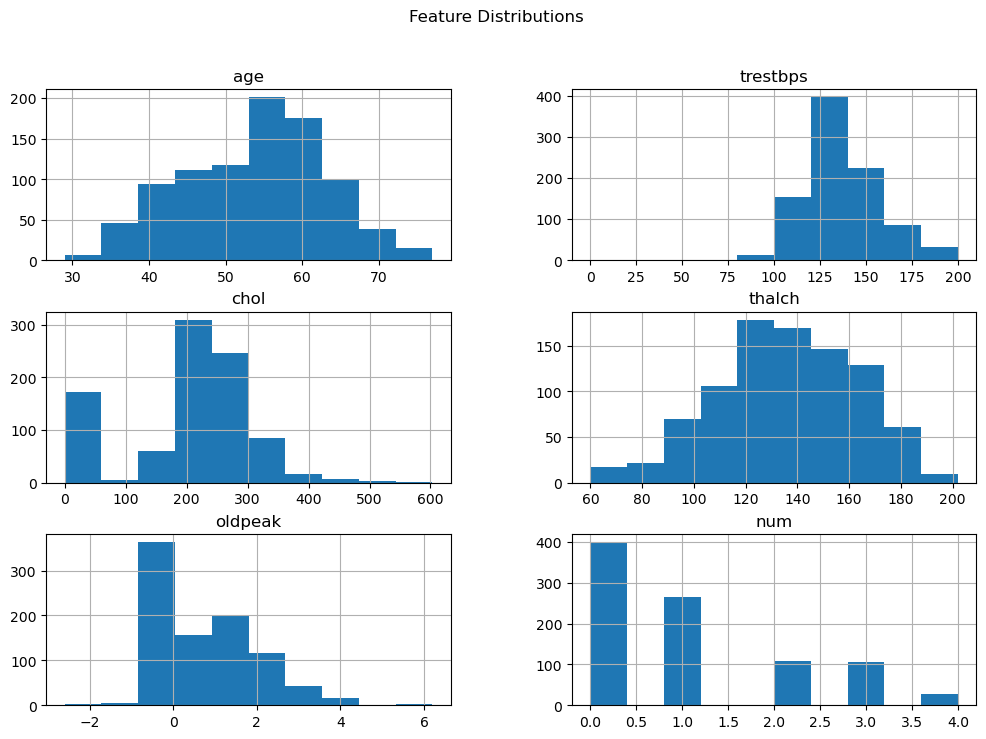

In [8]:
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

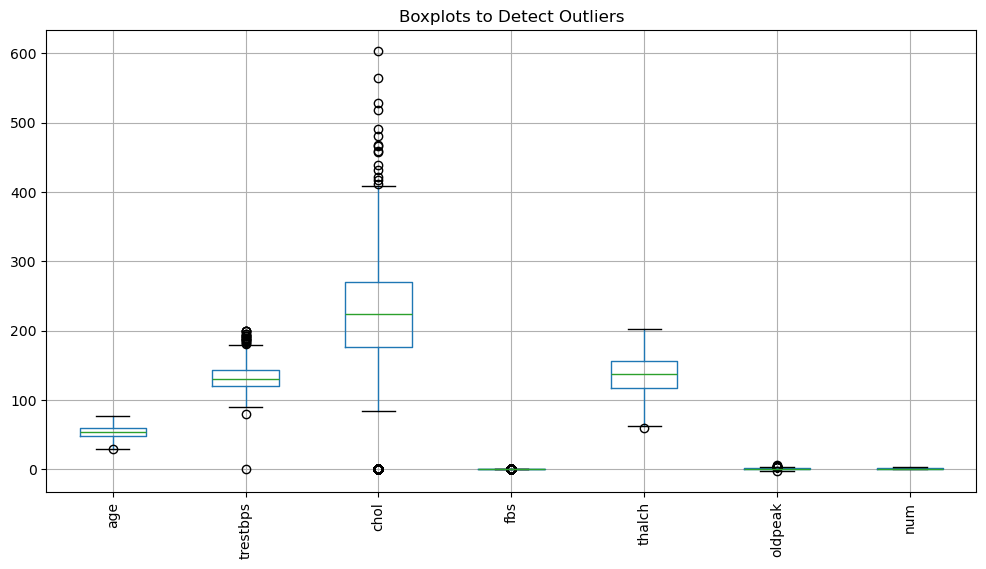

In [9]:
df.boxplot(rot=90, figsize=(12, 6))
plt.title("Boxplots to Detect Outliers")
plt.show()

In [11]:
Q3=df[numerical_cols].quantile(0.75)
Q1=df[numerical_cols].quantile(0.25)
IQR= Q3-Q1
Lower_Extreme= Q1-1.5*IQR
Upper_Extreme=Q3+1.5*IQR
print('Lower_Extreme :',Lower_Extreme,'Upper_Extreme :',Upper_Extreme)

Lower_Extreme : age         29.375
trestbps    84.000
chol        36.875
thalch      61.000
oldpeak     -2.250
num         -3.000
dtype: float64 Upper_Extreme : age          78.375
trestbps    180.000
chol        409.875
thalch      213.000
oldpeak       3.750
num           5.000
dtype: float64


C:\Users\NIHAL_MIRAJ\AppData\Local\Temp\ipykernel_10816\4167649694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


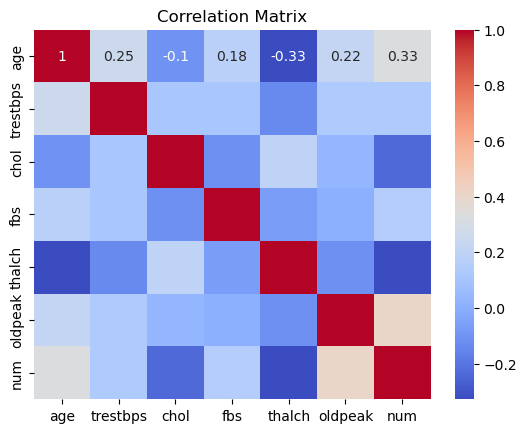

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
df['fbs'] = df['fbs'].astype(int)
df=pd.get_dummies(df,drop_first=True)

In [18]:
df.head(5)

age  trestbps  chol  fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0   63       145   233    1     150      2.3    0           0         1   
1   41       135   203    0     132      0.0    0           0         1   
2   57       140   192    0     148      0.4    0           0         1   
3   52       118   186    0     190      0.0    0           0         1   
4   57       110   201    0     126      1.5    0           0         1   

   cp_asymptomatic  ...  exang_False  exang_True  exang_FALSE  exang_TURE  \
0                0  ...            1           0            0           0   
1                0  ...            1           0            0           0   
2                1  ...            1           0            0           0   
3                0  ...            1           0            0           0   
4                1  ...            0           1            0           0   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0                  1           0                0                  1   
1                  0           1                0                  1   
2                  0           1                0                  1   
3                  0           1                0                  1   
4                  0           1                0                  1   

   thal_normal  thal_reversable defect  
0            0                       0  
1            0                       0  
2            0                       0  
3            0                       0  
4            0                       0  

[5 rows x 26 columns]

In [20]:
X = df.drop(columns=['num']) 
y =df['num']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Precision: 0.49
Recall: 0.51
F1 Score: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        89
           1       0.38      0.42      0.40        48
           2       0.25      0.23      0.24        22
           3       0.07      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.28      0.29      0.29       182
weighted avg       0.49      0.51      0.50       182



In [27]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [28]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
print(f"Best Parameters: {grid_search.best_params_}")
best_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [30]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.57
Precision: 0.46
Recall: 0.57
F1 Score: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        89
           1       0.38      0.52      0.44        48
           2       0.00      0.00      0.00        22
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.25      0.29      0.26       182
weighted avg       0.46      0.57      0.50       182



C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [32]:
y_pred_best = best_dt.predict(X_test)
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_best))

Tuned Accuracy: 0.57

Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        89
           1       0.38      0.52      0.44        48
           2       0.00      0.00      0.00        22
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.25      0.29      0.26       182
weighted avg       0.46      0.57      0.50       182



C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

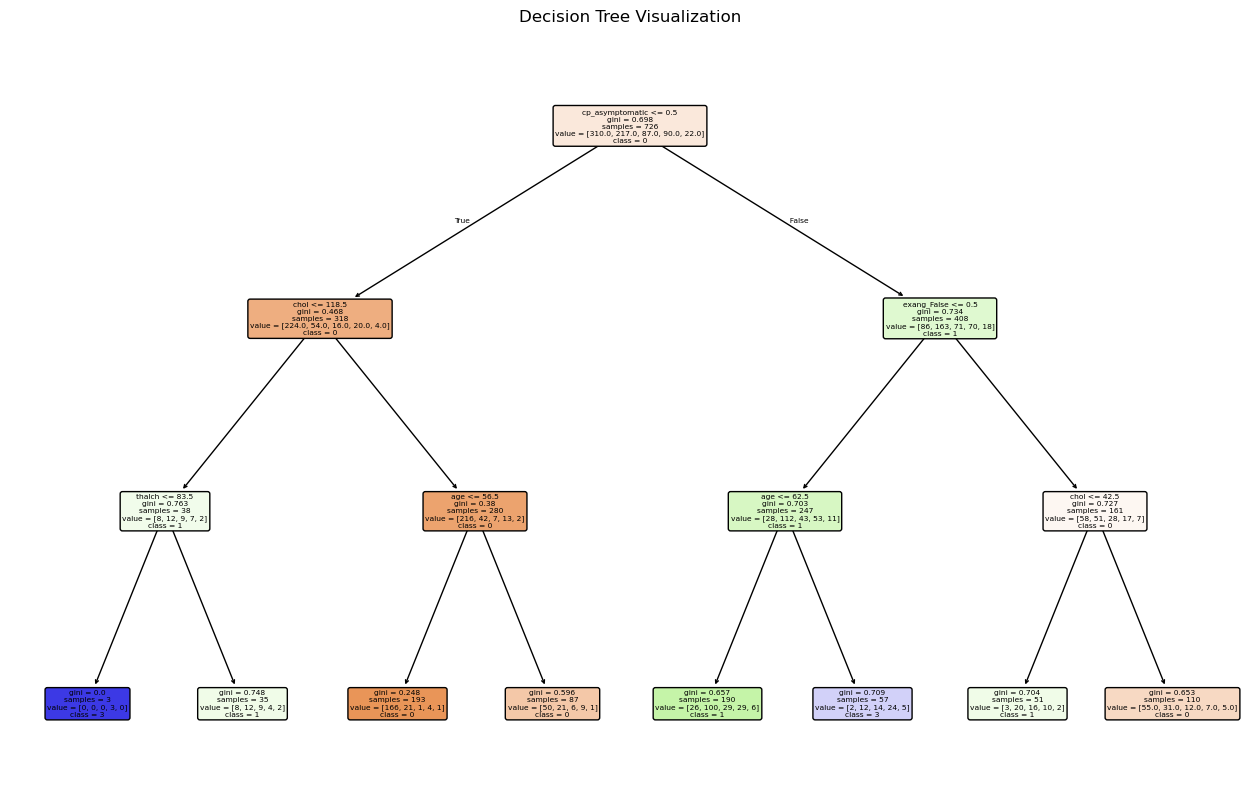

In [34]:
plt.figure(figsize=(16, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(i) for i in np.unique(y)], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()